# Analysis of AP-MS data

This notebook will use a dataset from a pulldown-experiment of the mitochondrial membrane protein p166 from Trypanosoma brucei (https://doi.org/10.1371/journal.ppat.1010207). The corresponding search results are available through PRIDE with the ID PXD033042.

In [1]:
import sys
sys.path.append('../..')
from autoprot import preprocessing as pp
from autoprot import analysis as ana
from autoprot import visualization as vis

Loading required package: rrcovNA
Loading required package: rrcov
Loading required package: robustbase
Scalable Robust Estimators with High Breakdown Point (version 1.7-1)

Scalable Robust Estimators with High Breakdown Point for
Incomplete Data (version 0.4-15)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: BiocManager
Bioconductor version '3.14' is out-of-date; the current release version '3.16'
  is available with R version '4.2'; see https://bioconductor.org/install
Loading required package: devtools
Loading required package: usethis

Attaching package: ‘devtools’

The following obj

In [2]:
import zipfile
import os

# Get a dict mapping the files matching the keyword (2nd arg) to their ftp download link
ftp_links = pp.fetch_from_pride("PXD033042", "txt")
# the returned dict contains all matching files in the PRIDE repo
for k, v in ftp_links.items():
    print(f"{k}: {v}")

# download the MaxQuant results if they are not present in the folder
# here we will use data from the untruncated mini p166 protein
if not os.path.isfile("mini-p166-HA_txt.zip"):
    pp.download_from_ftp(ftp_links['mini-p166-HA_txt.zip'], save_dir = '.')

# we will directly extract the proteinGroups.txt file from the folder without extracting to file
archive = zipfile.ZipFile("mini-p166-HA_txt.zip", 'r')
txt = archive.open('mini-p166-HA_txt/proteinGroups.txt')
pg = pp.read_csv(txt)

pg.head()

Found file mini-p166_deltac-ha_txt.zip
Found file checksum.txt
Found file mini-p166-ha_txt.zip
mini-p166_deltac-ha_txt.zip: ftp://ftp.pride.ebi.ac.uk/pride/data/archive/2022/06/PXD033042/mini-p166_deltaC-HA_txt.zip
checksum.txt: ftp://ftp.pride.ebi.ac.uk/pride/data/archive/2022/06/PXD033042/checksum.txt
mini-p166-ha_txt.zip: ftp://ftp.pride.ebi.ac.uk/pride/data/archive/2022/06/PXD033042/mini-p166-HA_txt.zip


,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,Taxonomy IDs
0,CON__P01030;CON__ENSEMBL:ENSBTAP00000007350,CON__P01030;CON__ENSEMBL:ENSBTAP00000007350,1;1,1;1,1;1,;,2,1,1,1,...,0,10226,True,10751,35007,55493,55493,NaN,NaN,-1;-1
1,CON__Q3MHN5;CON__ENSEMBL:ENSBTAP00000018229,CON__Q3MHN5;CON__ENSEMBL:ENSBTAP00000018229,3;3,3;3,3;3,;,2,3,3,3,...,1,3450;7919;9845,True;True;True,3596;8327;10345,11699;11700;26948;33717;33718,18407;18408;42308;53479;53480,18407;42308;53480,NaN,NaN,-1;-1
2,CON__ENSEMBL:ENSBTAP00000018574,CON__ENSEMBL:ENSBTAP00000018574,5,5,5,NaN,1,5,5,5,...,2,19;1752;2465;8452;8904,True;True;True;True;True,21;1840;2580;8881;9350,74;75;6201;8448;28787;28788;30298;30299;30300;...,137;138;9969;13258;45356;45357;47768;47769;477...,137;9969;13258;45356;47770,NaN,NaN,-1
3,CON__ENSEMBL:ENSBTAP00000038253,CON__ENSEMBL:ENSBTAP00000038253,16,4,2,NaN,1,16,4,2,...,3,237;800;1761;2672;4792;4793;4868;5430;6438;661...,True;False;False;False;False;False;False;False...,250;838;1849;1850;2795;4998;4999;5079;5660;566...,862;863;2778;2779;2780;2781;6230;6231;6232;623...,1420;1421;4387;4388;4389;4390;4391;4392;4393;4...,1421;4389;10015;14202;25685;25687;26139;28965;...,0,465,-1
4,CON__ENSEMBL:ENSBTAP00000038329,CON__ENSEMBL:ENSBTAP00000038329,1,1,1,NaN,1,1,1,1,...,4,5542,True,5784,18705;18706;18707,29581;29582;29583;29584,29583,NaN,NaN,-1


## Normalized vs non-normalized ratios

As we are interested in changes, normalisation of outliers might impede analysis. However, on strong background normalisation might also be beneficial.
Therefore, ratio vs. Intensity is checked for normalised and non-normalised ratios.

1787 rows before filter operation.
1663 rows after filter operation.


/home/aretaon/anaconda3/envs/autoprot/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


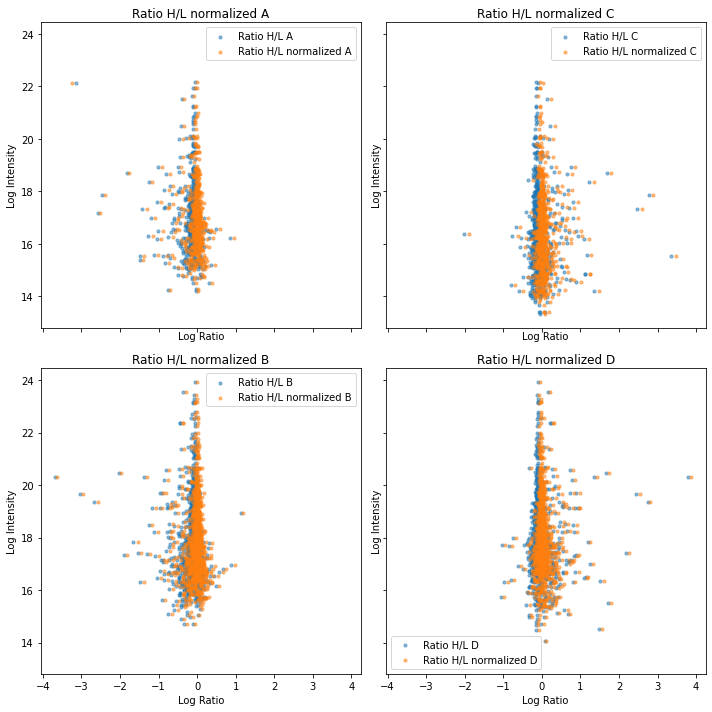

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# remove contaminants
pg = pp.cleaning(pg, file='proteinGroups')
# get ratio cols
protRatios = pg.filter(regex="^Ratio H\/L [A,B,C,D]+$").columns
normRatios = pg.filter(regex="^Ratio .\/. normalized ").columns
# get the separate intensity cols for the experiments
intensities = pg.filter(regex="Intensity [A,B,C,D]+$").columns

fig, ax = plt.subplots(nrows=2,ncols=2, sharex=True, sharey=True, figsize=(10,10))

for idx, col in enumerate(protRatios.to_list() + normRatios.to_list()):
    # the column number goes from 0 to 3
    c = (idx - 4*(idx//4)) // 2
    # the row number goes from 0 to 1
    r = idx - (idx // 2)*2
    this_ax = ax[r][c]
    # normalised values are plotted on top of the non-nomrmalised values for comparison
    this_ax.scatter(np.log(pg[col]),
                    np.log(pg[intensities[r]]),
                    label=col,
                    alpha=0.5,
                    s=10)

    this_ax.set_xlabel('Log Ratio')
    this_ax.set_ylabel('Log Intensity')
    this_ax.set_title(col)
    # add a legend for colour scheme
    this_ax.legend()
plt.tight_layout()


## Preprocessing
This section has the following gaosl

- Load MaxQuant data and filter out contaminants e.g. from sample processing.
- Remove proteins that were identified in less than 3 replicates (incl label switch).
- MQ returns H/L ratios, as we are interested in Ctrl vs. Tet treatment, these ratios have to be inversed for the label switch experiments.
- Plot a histogram to show the distribution of enrichment in the different experiments.

1663 rows before filter operation.
835 rows after filter operation.


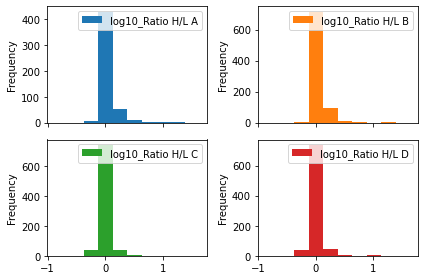

In [4]:
# filter proteins with at least 3 valid ratios
pg = pp.filter_vv(pg, groups=[protRatios.to_list()], n=3)

# invert the last to experiment (i.e. label switches)
invert = [-1,-1,1,1]
# calculate log value of ratios
pg = pp.log(pg, protRatios, base=10, invert=invert)

# plot the log ratios
protRatio_log = pg.filter(regex="^log10_Ratio H\/L [A,B,C,D]+$").columns
hist = pg[protRatio_log].plot(kind='hist',
                              bins=10,
                              subplots=True,
                              layout=(2,2),
                              sharex=True)
plt.tight_layout()

## Data Analysis
- Perform 1-sample t-test of all replicates to determine deviation from zero
- The t-test returns the mean value of the processed protein ratios that will be used for data visualisation
- The p-value is controlled by FDR Benjamini-Hochberg correction

In [5]:
reps = ['log10_Ratio H/L A', 'log10_Ratio H/L B','log10_Ratio H/L C', 'log10_Ratio H/L D']
# perform standard ttest
pg = ana.ttest(df=pg, reps=reps, cond="_TetvsCtrl_tt", adjust_p_vals=True, alternative='greater')
# perform LIMMA
pg = ana.limma(df=pg, reps=reps, cond="_TetvsCtrl")

Performing one-sample t-Test
LIMMA: Assuming a one sample test


## Data Vis
- The p value from the t-test is plotted against the mean ratio (i.e Tet vs Ctrl)
- Values are highlighted at levels corresponding to an alpha value of 0.05 and an enrichment of at least twofold

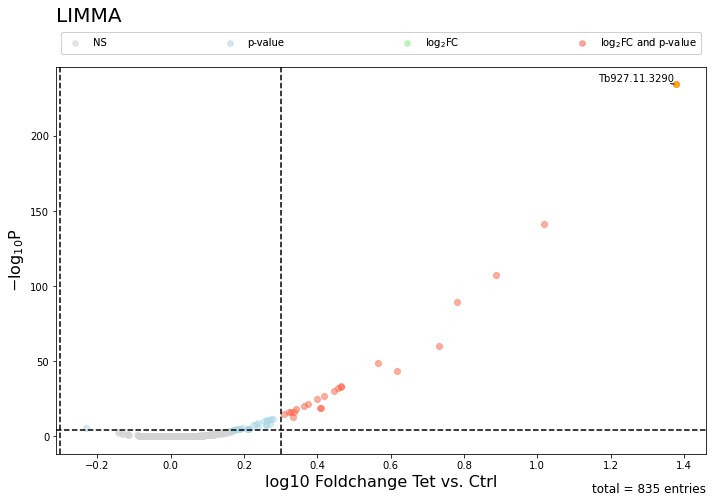

In [6]:
pg['annotProtName'] = pg['Majority protein IDs'].str.split(':').str[0]

#### Plot LIMMA ####
fig, ax = plt.subplots(1, figsize=(10,7))

vis.volcano(df=pg,
            log_fc_colname='logFC_TetvsCtrl',
            p_colname='adj.P.Val_TetvsCtrl',
            log_fc_thresh=np.log10(2),
            p_thresh=10e-5,
            annotate_colname='annotProtName',
            annotate='highlight',
            highlight=pg[pg['Protein IDs'].str.contains('Tb927.11.3290')].index,
            title= 'LIMMA',
            ax=ax)

ax.set_xlabel('log10 Foldchange Tet vs. Ctrl')
plt.tight_layout()

The volcano plot function automatically places the labels according to a density filter and with sufficient distance (similar to the EnhancedVolcano function in R: https://bioconductor.org/packages/release/bioc/vignettes/EnhancedVolcano/inst/doc/EnhancedVolcano.html)

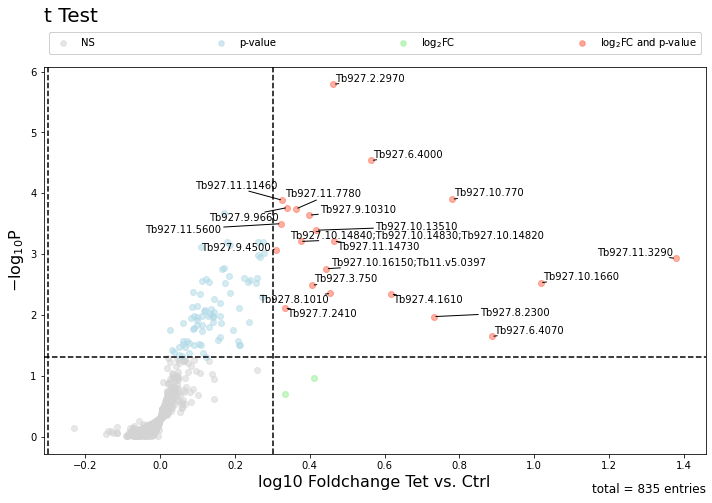

In [13]:
#### Plot ttest ####
fig, ax = plt.subplots(1, figsize=(10,7))

vis.volcano(df=pg,
            log_fc_colname='logFC_TetvsCtrl',
            p_colname='pValue_TetvsCtrl_tt',
            log_fc_thresh=np.log10(2),
            p_thresh=0.05,
            annotate_colname='annotProtName',
            annotate='p-value and log2FC',
            title= 't Test',
            ax=ax)

ax.set_xlabel('log10 Foldchange Tet vs. Ctrl')
plt.tight_layout()

In [11]:
import plotly.io as pio

fig = vis.ivolcano(df=pg,
            log_fc_colname='logFC_TetvsCtrl',
            p_colname='adj.P.Val_TetvsCtrl',
            log_fc_thresh=np.log10(2),
            p_thresh=10e-5,
            annotate_colname='annotProtName',
            #annotate='highlight',
            highlight=pg[pg['Protein IDs'].str.contains('Tb927.11.3290')].index,
            title= 'LIMMA',
            #ax=ax
            ret_fig=True
            )

# having the figure update you can change the figure layout any time after plotting
fig.update_layout(pio.templates['simple_white']['layout'])